# Analyzing Multiple Stations with SensorManager

This notebook demonstrates how to:
- Load data using `DataLoader` and configuration from `ConfigurationManager`.
- Initialize a `SensorManager` to manage multiple stations and their sensors.
- Retrieve temperature data from each station, compute basic statistics, and plot the station locations on a map.

**Key Steps:**
1. Load NetCDF data and config.
2. Initialize `SensorManager`.
3. Print temperature statistics (mean, max, min, std) for each station.
4. Plot station locations along with data extents on a map.




Loading and combining Temperature files...
Loading temperature data from: ../data/NetCDF/April-30-temp.nc
Loading temperature data from: ../data/NetCDF/May-01-temp.nc
Loading temperature data from: ../data/NetCDF/May-02-temp.nc
Loading temperature data from: ../data/NetCDF/May-03-temp.nc

Loading and combining U_wind files...
Loading u_wind data from: ../data/NetCDF/April-30-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-01-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-02-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-03-u-wind.nc

Loading and combining V_wind files...
Loading v_wind data from: ../data/NetCDF/April-30-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-01-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-02-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-03-v-wind.nc
Available Stations (lat, lon): [(np.float64(56.05), np.float64(-112.05)), (np.float64(57.05), np.float64(-111.05000000000005)), (np.float64(56.949999999999996), np.

,Latitude,Longitude,Mean Temp (K),Max Temp (K),Min Temp (K),Std Temp,Count
0,56.05,-112.05,288.317688,300.497070,277.442444,6.132779,96
1,57.05,-111.05,288.459930,302.001160,277.122192,6.163898,96
2,56.95,-111.25,288.927643,302.635254,277.898804,6.251727,96
3,56.55,-111.15,289.070587,302.698303,278.500061,6.246727,96
4,56.15,-110.95,288.276489,301.226990,277.940857,6.265741,96
5,57.25,-111.65,288.952972,302.575623,276.945618,6.483683,96


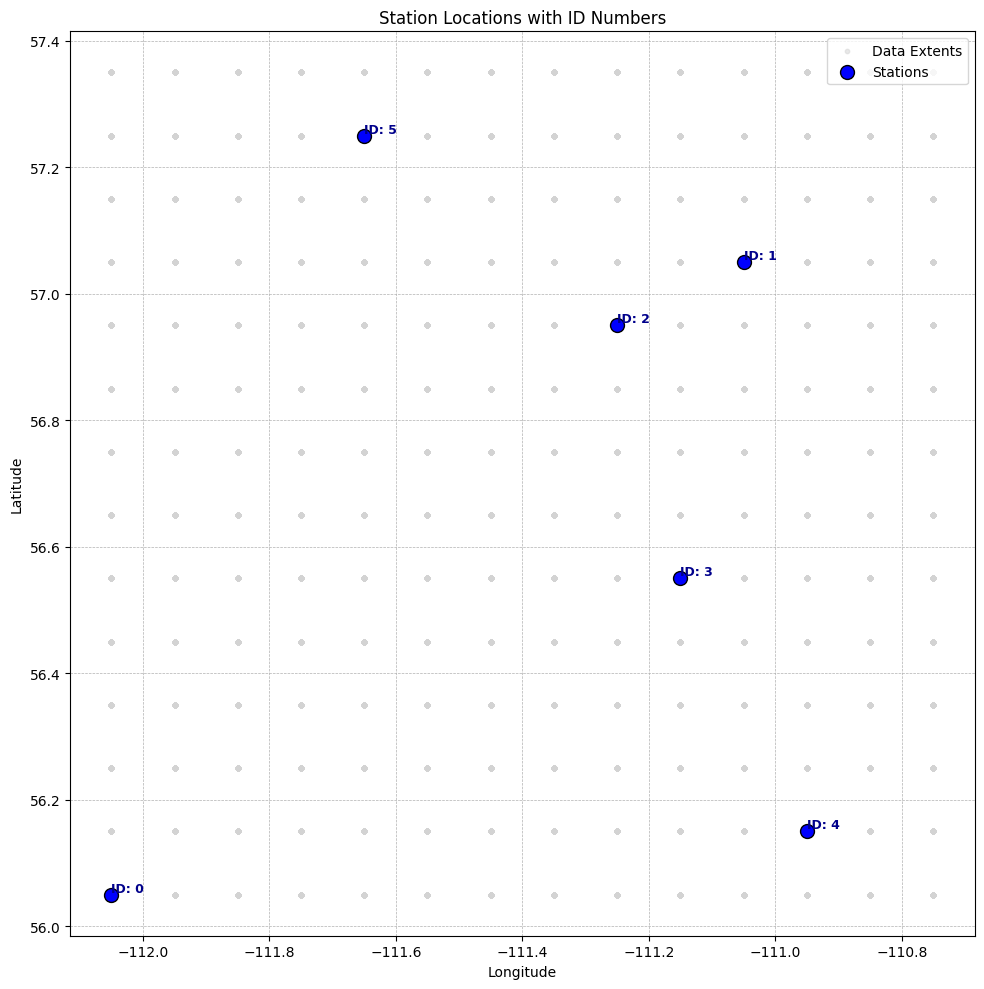

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Ensure we can import from src
sys.path.append("..")

from src.data_handling.data_loader import DataLoader
from src.utils.configuration_manager import ConfigurationManager
from src.sensors.sensor_manager import SensorManager

# Step 1: Load Data
data_dir = "../data/NetCDF"
file_groups = {
    "temperature": ["April-30-temp.nc", "May-01-temp.nc", "May-02-temp.nc", "May-03-temp.nc"],
    "u_wind": ["April-30-u-wind.nc", "May-01-u-wind.nc", "May-02-u-wind.nc", "May-03-u-wind.nc"],
    "v_wind": ["April-30-v-wind.nc", "May-01-v-wind.nc", "May-02-v-wind.nc", "May-03-v-wind.nc"]
}

loader = DataLoader(data_dir=data_dir)
data_dict = loader.load_all(file_groups)

# Step 2: Load Configuration
config_manager = ConfigurationManager(config_path="../config/default_config.yaml")

# Step 3: Initialize SensorManager
sensor_manager = SensorManager(data_dict=data_dict, config_manager=config_manager)
all_stations = sensor_manager.get_all_stations()

print("Available Stations (lat, lon):", list(all_stations.keys()))

# Step 4: Retrieve Temperature Data and Compute Statistics
summary_rows = []
for (lat, lon), station in all_stations.items():
    temp_sensor = station.get_sensor("temperature")
    if temp_sensor:
        stats = temp_sensor.calculate_statistics()
        mean_val = stats["mean"]
        max_val = stats["max"]
        min_val = stats["min"]
        std_val = stats["std"]
        count_val = stats["count"]
        
        summary_rows.append({
            "Latitude": lat,
            "Longitude": lon,
            "Mean Temp (K)": mean_val,
            "Max Temp (K)": max_val,
            "Min Temp (K)": min_val,
            "Std Temp": std_val,
            "Count": count_val
        })
    else:
        summary_rows.append({
            "Latitude": lat,
            "Longitude": lon,
            "Mean Temp (K)": None,
            "Max Temp (K)": None,
            "Min Temp (K)": None,
            "Std Temp": None,
            "Count": 0
        })

summary_report = pd.DataFrame(summary_rows)
print("\nStation Temperature Summary:")
display(summary_report)

# Step 5: Plot the Stations and Data Extents
# Extract data extents from the temperature_df (assuming temperature is representative)
# Plot the Stations and Data Extents with Station ID instead of Mean Temperature
temperature_df = data_dict["temperature"]

plt.figure(figsize=(10, 10))

# Plot the data extents
plt.scatter(temperature_df["longitude"], temperature_df["latitude"],
            color="lightgrey", alpha=0.5, s=10, label="Data Extents")

# Plot station locations
plt.scatter(summary_report["Longitude"], summary_report["Latitude"],
            c="blue", s=100, edgecolor="black", label="Stations")

# Annotate stations with ID number
for idx, row in summary_report.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    station_id = idx  # Using the DataFrame index as the ID number
    plt.text(lon, lat, f"ID: {station_id}", fontsize=9,
             ha="left", va="bottom", color="darkblue", fontweight="bold")

# Ensure equal aspect ratio for lat/lon
plt.gca().set_aspect('equal', adjustable='box')

plt.title("Station Locations with ID Numbers")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper right")
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [2]:
# Test Universal Encoder
encoded_data = temp_sensor.encode_data()
print("Encoded Data with Universal Encoder:")
display(encoded_data.head())

# Test Hierarchical Encoder
hierarchical_encoded = temp_sensor.encode_hierarchically(resolutions=[10, 20, 50])
print("Hierarchical Encoded Data:")
for res, values in hierarchical_encoded.items():
    print(f"\nResolution {res}:")
    display(values.head())


Encoded Data with Universal Encoder:


/Users/richardpurcell/Library/CloudStorage/Dropbox/dal04/PhD/projects/universal-sensing-etm/notebooks/../src/sensors/sensor.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data["encoded_value"] = encoded_values


,valid_time,latitude,longitude,number,expver,value,variable,encoded_value
18,2016-04-30 00:00:00,57.25,-111.65,0,0001,292.323547,temperature,6
214,2016-04-30 01:00:00,57.25,-111.65,0,0001,291.724365,temperature,5
410,2016-04-30 02:00:00,57.25,-111.65,0,0001,289.686035,temperature,4
606,2016-04-30 03:00:00,57.25,-111.65,0,0001,287.289551,temperature,3
802,2016-04-30 04:00:00,57.25,-111.65,0,0001,285.522339,temperature,2


Hierarchical Encoded Data:

Resolution resolution_10:


18     6
214    5
410    4
606    3
802    2
Name: value, dtype: int64


Resolution resolution_20:


18     12
214    11
410     9
606     7
802     5
Name: value, dtype: int64


Resolution resolution_50:


18     30
214    29
410    24
606    18
802    14
Name: value, dtype: int64


Loading and combining Temperature files...
Loading temperature data from: ../data/NetCDF/April-30-temp.nc
Loading temperature data from: ../data/NetCDF/May-01-temp.nc
Loading temperature data from: ../data/NetCDF/May-02-temp.nc
Loading temperature data from: ../data/NetCDF/May-03-temp.nc

Loading and combining U_wind files...
Loading u_wind data from: ../data/NetCDF/April-30-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-01-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-02-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-03-u-wind.nc

Loading and combining V_wind files...
Loading v_wind data from: ../data/NetCDF/April-30-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-01-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-02-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-03-v-wind.nc
Encoded Temperature Data (Symbolic Levels):


/Users/richardpurcell/Library/CloudStorage/Dropbox/dal04/PhD/projects/universal-sensing-etm/notebooks/../src/sensors/sensor.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data["encoded_value"] = encoded_values


,valid_time,latitude,longitude,number,expver,value,variable,encoded_value
182,2016-04-30 00:00:00,56.05,-112.05,0,0001,289.713928,temperature,4
378,2016-04-30 01:00:00,56.05,-112.05,0,0001,288.975952,temperature,4
574,2016-04-30 02:00:00,56.05,-112.05,0,0001,287.570435,temperature,3
770,2016-04-30 03:00:00,56.05,-112.05,0,0001,285.500183,temperature,2
966,2016-04-30 04:00:00,56.05,-112.05,0,0001,284.097168,temperature,2


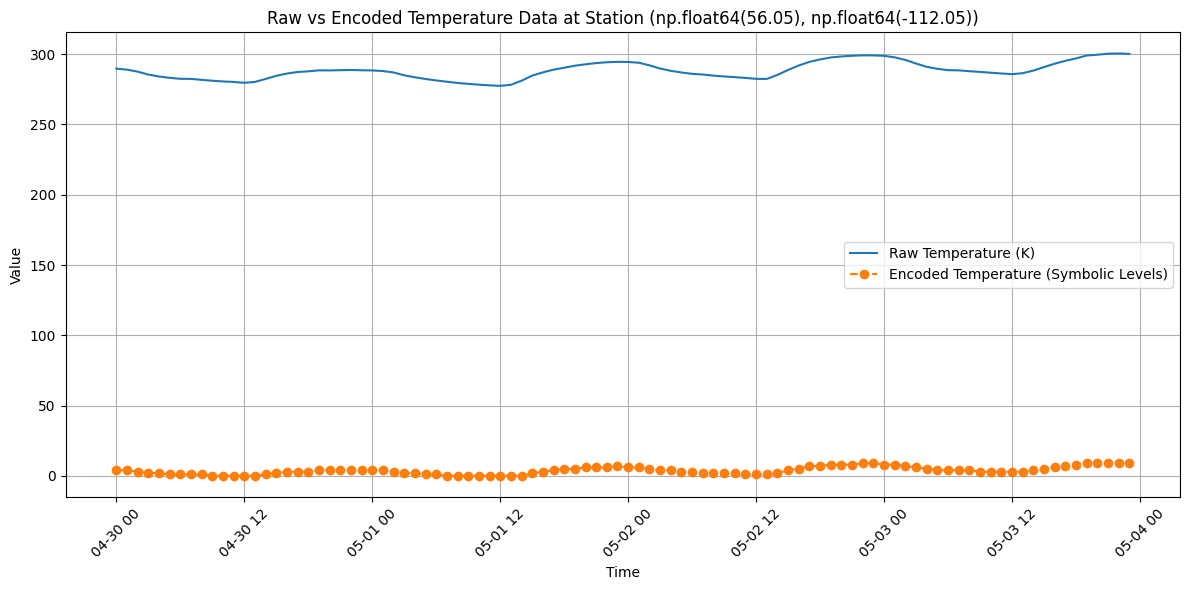

Hierarchical Encoded Data (Multiple Resolutions):

Resolution resolution_10:


182    4
378    4
574    3
770    2
966    2
Name: value, dtype: int64


Resolution resolution_20:


182    9
378    9
574    7
770    5
966    4
Name: value, dtype: int64


Resolution resolution_50:


182    24
378    22
574    19
770    13
966    10
Name: value, dtype: int64

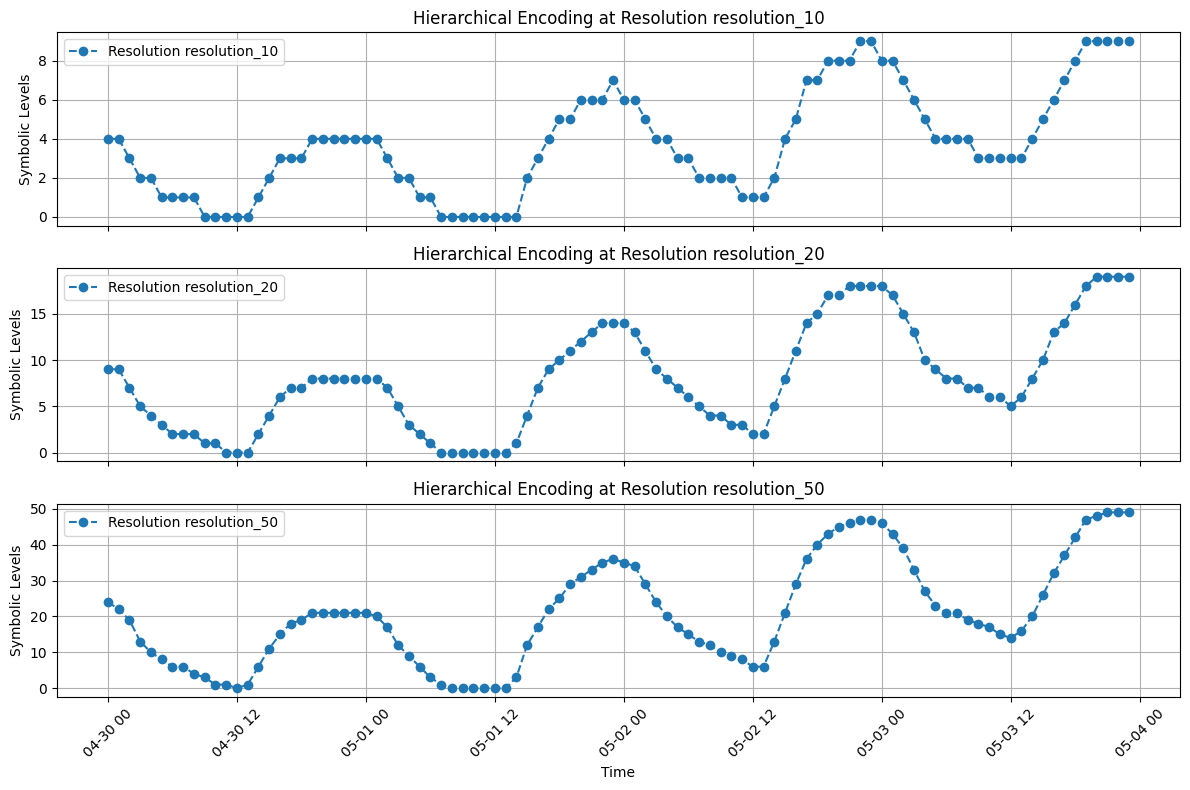

In [3]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Adjust path for imports
sys.path.append("..")

from src.data_handling.data_loader import DataLoader
from src.sensors.sensor import Sensor
from src.utils.configuration_manager import ConfigurationManager
from src.sensors.sensor_manager import SensorManager

# Step 1: Load Data
data_dir = "../data/NetCDF"
file_groups = {
    "temperature": ["April-30-temp.nc", "May-01-temp.nc", "May-02-temp.nc", "May-03-temp.nc"],
    "u_wind": ["April-30-u-wind.nc", "May-01-u-wind.nc", "May-02-u-wind.nc", "May-03-u-wind.nc"],
    "v_wind": ["April-30-v-wind.nc", "May-01-v-wind.nc", "May-02-v-wind.nc", "May-03-v-wind.nc"]
}


loader = DataLoader(data_dir=data_dir)
data_dict = loader.load_all(file_groups)

# Step 2: Initialize SensorManager
config_manager = ConfigurationManager(config_path="../config/default_config.yaml")
sensor_manager = SensorManager(data_dict=data_dict, config_manager=config_manager)

# Step 3: Retrieve a Station and Sensor
stations = sensor_manager.get_all_stations()
station_coords = list(stations.keys())[0]  # Take the first station
station = sensor_manager.get_station(*station_coords)

# Retrieve temperature sensor
temp_sensor = station.get_sensor("temperature")

# Step 4: Apply the Universal Encoder
encoded_data = temp_sensor.encode_data()
print("Encoded Temperature Data (Symbolic Levels):")
display(encoded_data.head())

# Plot Raw vs Encoded Data
plt.figure(figsize=(12, 6))
plt.plot(temp_sensor.get_data()["valid_time"], temp_sensor.get_data()["value"], label="Raw Temperature (K)", color="tab:blue")
plt.plot(temp_sensor.get_data()["valid_time"], temp_sensor.get_data()["encoded_value"], label="Encoded Temperature (Symbolic Levels)", linestyle='--', marker='o', color="tab:orange")
plt.title(f"Raw vs Encoded Temperature Data at Station {station_coords}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Apply Hierarchical Encoder
hierarchical_encoded = temp_sensor.encode_hierarchically(resolutions=[10, 20, 50])
print("Hierarchical Encoded Data (Multiple Resolutions):")
for res, values in hierarchical_encoded.items():
    print(f"\nResolution {res}:")
    display(values.head())

# Step 6: Plot Hierarchical Encoded Data
fig, ax = plt.subplots(len(hierarchical_encoded), 1, figsize=(12, 8), sharex=True)

for idx, (res, encoded_values) in enumerate(hierarchical_encoded.items()):
    ax[idx].plot(temp_sensor.get_data()["valid_time"], encoded_values, label=f"Resolution {res}", linestyle='--', marker='o')
    ax[idx].set_title(f"Hierarchical Encoding at Resolution {res}")
    ax[idx].set_ylabel("Symbolic Levels")
    ax[idx].grid(True)
    ax[idx].legend()

ax[-1].set_xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Loading and combining Temperature files...
Loading temperature data from: ../data/NetCDF/April-30-temp.nc
Loading temperature data from: ../data/NetCDF/May-01-temp.nc
Loading temperature data from: ../data/NetCDF/May-02-temp.nc
Loading temperature data from: ../data/NetCDF/May-03-temp.nc

Loading and combining U_wind files...
Loading u_wind data from: ../data/NetCDF/April-30-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-01-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-02-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-03-u-wind.nc

Loading and combining V_wind files...
Loading v_wind data from: ../data/NetCDF/April-30-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-01-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-02-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-03-v-wind.nc
Before cleaning, NaN count: 0
After cleaning, NaN count: 0
Applying state-aware precision control...


/Users/richardpurcell/Library/CloudStorage/Dropbox/dal04/PhD/projects/universal-sensing-etm/notebooks/../src/sensors/sensor.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data["variability"] = variability
/Users/richardpurcell/Library/CloudStorage/Dropbox/dal04/PhD/projects/universal-sensing-etm/notebooks/../src/sensors/sensor.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data["precision_levels"] = precision_levels
/Users/richardpurcell/Library/CloudStorage/Dropbox/dal04/PhD/projects/

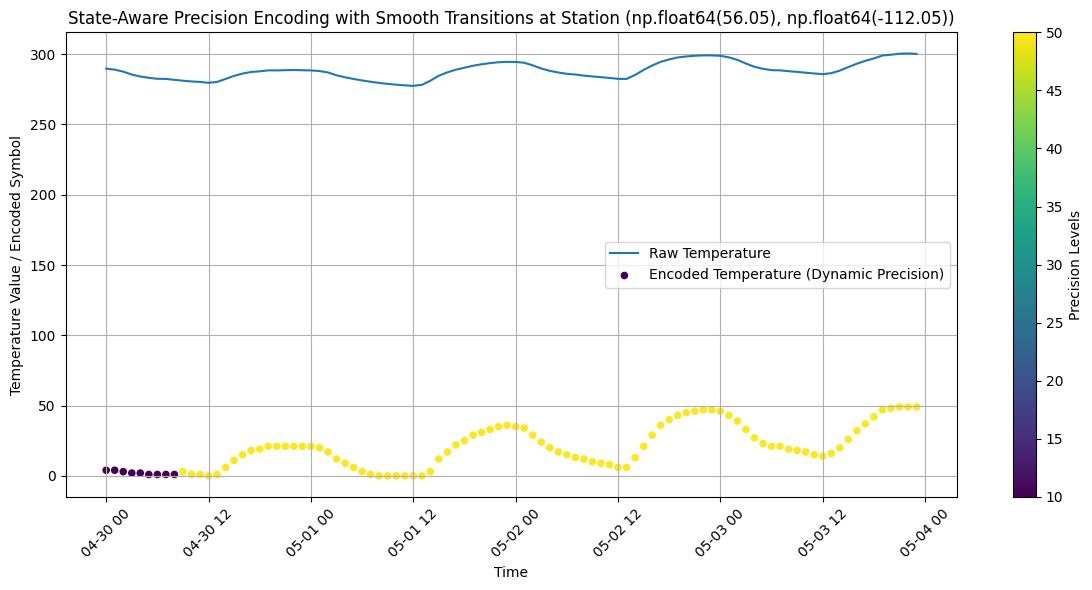

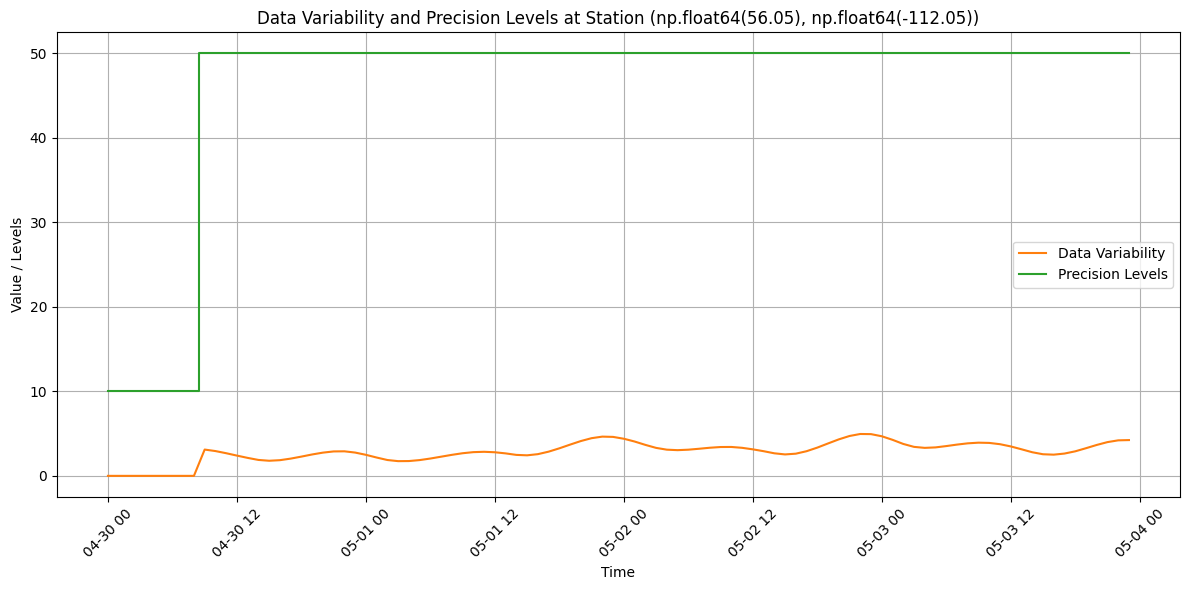

Encoded Data with State-Aware Precision Control:


,valid_time,value,variability,precision_levels,encoded_value_dynamic
182,2016-04-30 00:00:00,289.713928,0.000000,10,4
378,2016-04-30 01:00:00,288.975952,0.000000,10,4
574,2016-04-30 02:00:00,287.570435,0.000000,10,3
770,2016-04-30 03:00:00,285.500183,0.000000,10,2
966,2016-04-30 04:00:00,284.097168,0.000000,10,2
...,...,...,...,...,...
18018,2016-05-03 19:00:00,299.052551,3.272609,50,47
18214,2016-05-03 20:00:00,299.608521,3.657953,50,48
18410,2016-05-03 21:00:00,300.314148,3.994740,50,49
18606,2016-05-03 22:00:00,300.497070,4.204166,50,49


In [4]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Adjust path for imports
sys.path.append("..")

from src.data_handling.data_loader import DataLoader
from src.sensors.sensor import Sensor
from src.utils.configuration_manager import ConfigurationManager
from src.sensors.sensor_manager import SensorManager

# Step 1: Load Data
data_dir = "../data/NetCDF"
file_groups = {
    "temperature": ["April-30-temp.nc", "May-01-temp.nc", "May-02-temp.nc", "May-03-temp.nc"],
    "u_wind": ["April-30-u-wind.nc", "May-01-u-wind.nc", "May-02-u-wind.nc", "May-03-u-wind.nc"],
    "v_wind": ["April-30-v-wind.nc", "May-01-v-wind.nc", "May-02-v-wind.nc", "May-03-v-wind.nc"]
}

loader = DataLoader(data_dir=data_dir)
data_dict = loader.load_all(file_groups)

# Step 2: Initialize SensorManager
config_manager = ConfigurationManager(config_path="../config/default_config.yaml")
sensor_manager = SensorManager(data_dict=data_dict, config_manager=config_manager)

# Step 3: Retrieve a Station and Sensor
stations = sensor_manager.get_all_stations()
station_coords = list(stations.keys())[0]
station = sensor_manager.get_station(*station_coords)
temp_sensor = station.get_sensor("temperature")

# Step 4: Preprocess and Encode with State-Aware Precision Control
print("Before cleaning, NaN count:", temp_sensor.data["value"].isna().sum())

# Replace NaN values in the data
temp_sensor.data.loc[:, "value"] = temp_sensor.data["value"].ffill().fillna(0.0)

print("After cleaning, NaN count:", temp_sensor.data["value"].isna().sum())

# Apply state-aware precision encoding
print("Applying state-aware precision control...")
encoded_data = temp_sensor.encode_with_dynamic_precision()

# Step 5: Plot Results - Raw Data and Encoded Data
plt.figure(figsize=(12, 6))

# Raw Temperature Line
plt.plot(encoded_data["valid_time"], encoded_data["value"], label="Raw Temperature", color="tab:blue")

# Encoded Temperature Points with Dynamic Precision
scatter = plt.scatter(
    encoded_data["valid_time"], encoded_data["encoded_value_dynamic"], 
    c=encoded_data["precision_levels"], cmap="viridis", label="Encoded Temperature (Dynamic Precision)", s=20
)

plt.colorbar(scatter, label="Precision Levels")
plt.title(f"State-Aware Precision Encoding with Smooth Transitions at Station {station_coords}")
plt.xlabel("Time")
plt.ylabel("Temperature Value / Encoded Symbol")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Plot Variability and Precision Levels Over Time
plt.figure(figsize=(12, 6))

# Variability over Time
plt.plot(encoded_data["valid_time"], encoded_data["variability"], label="Data Variability", color="tab:orange")

# Precision Levels over Time
plt.step(encoded_data["valid_time"], encoded_data["precision_levels"], where="mid", 
         label="Precision Levels", color="tab:green")

plt.title(f"Data Variability and Precision Levels at Station {station_coords}")
plt.xlabel("Time")
plt.ylabel("Value / Levels")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Display Encoded Data Table
print("Encoded Data with State-Aware Precision Control:")
display(encoded_data[["valid_time", "value", "variability", "precision_levels", "encoded_value_dynamic"]].tail(100))


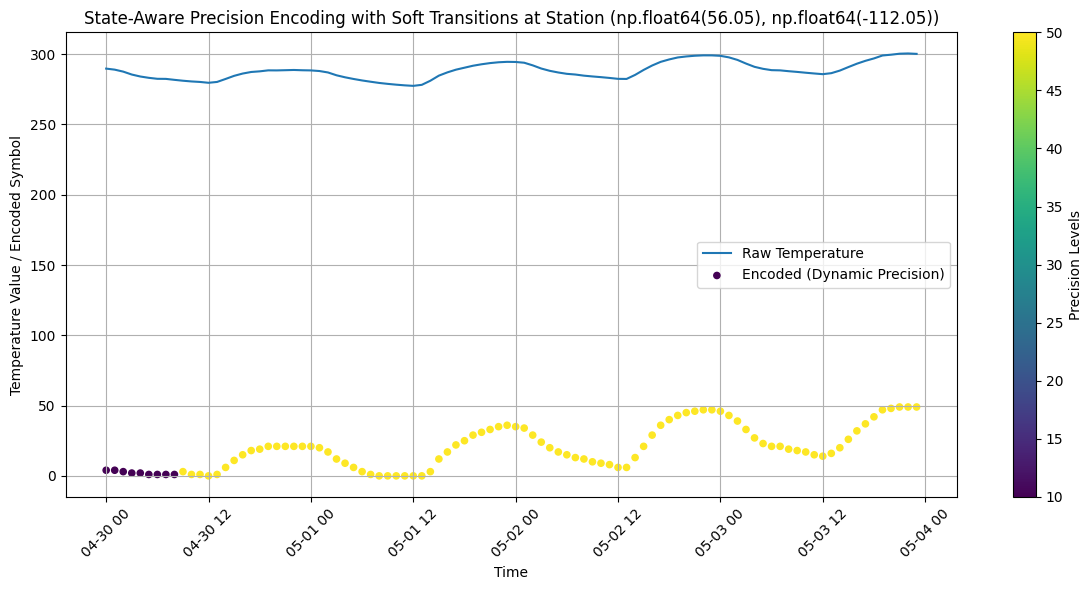

In [5]:
# Plot Results with Smoothed Encoding
plt.figure(figsize=(12, 6))
plt.plot(encoded_data["valid_time"], encoded_data["value"], label="Raw Temperature", color="tab:blue")
plt.scatter(encoded_data["valid_time"], encoded_data["encoded_value_dynamic"], 
            c=encoded_data["precision_levels"], cmap="viridis", label="Encoded (Dynamic Precision)", s=20)
plt.colorbar(label="Precision Levels")
plt.title(f"State-Aware Precision Encoding with Soft Transitions at Station {station_coords}")
plt.xlabel("Time")
plt.ylabel("Temperature Value / Encoded Symbol")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
